# **Convolutional Neural Networks (CNNs)**

Convolutional Neural Networks (CNNs) are a type of deep learning model particularly well-suited for image and video recognition tasks. They work by using convolutional layers to automatically and adaptively learn spatial hierarchies of features from input images. Basic tasks that can be done from scratch with CNNs include image classification, where the model learns to categorize images into predefined classes, and object detection, where the model identifies and locates objects within an image.

### **Basics of Convolutional Neural Networks**

Basics of Convolutional Neural Networks
CNNs work by extracting features from images using convolutional layers, pooling layers, and activation functions. These layers allow CNNs to learn complex relationships between features, identify objects or features regardless of their position, and reduce the computational complexity of the network. 

**Feature maps:** are a key concept in CNNs, which are generated by convolving filters over the input image, and each filter specializes in detecting specific features. The feature maps serve as the input for subsequent layers, enabling the network to learn higher-level features and make accurate predictions. 

**Parameter sharing** is another critical aspect of CNNs. It allows the network to detect similar patterns regardless of their location in the image, promoting spatial invariance. This enhances the network's robustness and generalization ability. Understanding these key components of CNNs is essential for unlocking their full potential in visual data analysis.

### **Convolutional Neural Networks vs Recurrent Neural Networks**
While Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) are different architectures designed for different tasks, they share some similarities in their ability to capture and process sequential data. Both CNNs and RNNs operate on local receptive fields. CNNs and some variants of RNNs, such as Long Short-Term Memory (LSTM), utilize parameter sharing. CNNs are also being increasingly used in conjunction with other machine learning techniques, such as natural language processing.

**Convolutional Layer**
Convolutional layers in CNNs extract features from input images through convolution, filter application, and the use of multiple filters. 

**Convolution and Filter**
Convolution applies filters to the input image, sliding across and generating feature maps, while filters are small tensors with learnable weights, capturing specific patterns or features. Multiple filters detect various visual features simultaneously, enabling rich representation.

**Padding and Stride Choices**

Padding preserves spatial dimensions by adding pixels around the input image. Stride determines the shift of the filter's position during convolution. Proper choices control output size, spatial information, and receptive fields. Zero padding is a technique used in CNNs to maintain the spatial dimensions of feature maps when applying convolutional operations. It involves adding extra rows and columns of zeros around the input, which helps preserve the size and resolution of the feature maps during the convolution process and prevents information loss at the borders of the input data.

**Multiple Filters for Feature Extraction**
Each filter specializes in detecting specific patterns or features. Multiple filters capture diverse aspects of the input image simultaneously, while filter weights are learned through training, allowing adaptation to relevant patterns. The filter size in CNNs plays a crucial role in feature extraction, influencing the network's ability to detect and capture relevant patterns and structures in the input data.

Understanding convolution, padding, stride, and multiple filters is crucial for feature extraction in CNNs, facilitating the identification of patterns, spatial information capture, and building robust visual representations.

**Pooling Operations**
Pooling layers are an integral part of Convolutional Neural Networks (CNNs) and play a crucial role in downsampling feature maps while retaining important features. In this section, explore the purpose of pooling layers, commonly used pooling techniques such as max pooling and average pooling, and how pooling helps reduce spatial dimensions.

Two popular pooling techniques employed in CNNs are max pooling and average pooling. 

**Max pooling** selects the maximum value from a specific window or region within the feature map. It preserves the most prominent features detected by the corresponding convolutional filters.
**Average pooling** calculates the average value of the window, providing a smoothed representation of the features. 

### **Architectures and Variants of Convolutional Neural Networks (CNNs)**

**LeNet-5** 
LeNet-5, introduced by Yann LeCun et al. in 1998, was one of the pioneering CNN architectures. It was designed for handwritten digit recognition and consisted of two convolutional layers, followed by average pooling, fully connected layers, and a softmax output layer. LeNet-5's lightweight architecture and efficient use of shared weights laid the foundation for modern CNNs, influencing subsequent developments in the field.

**AlexNet**
AlexNet developed by Alex Krizhevsky et al. in 2012, made significant strides in image classification. It won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012 and achieved a significant improvement over previous methods. AlexNet featured a deeper architecture with multiple convolutional layers, introduced the concept of ReLU activations, and employed techniques like dropout for regularization. Its success paved the way for the resurgence of deep learning in computer vision.

**VGGNet**
VGGNet, proposed by Karen Simonyan and Andrew Zisserman in 2014, introduced deeper architectures with up to 19 layers. VGGNet's key characteristic was the consistent use of 3x3 convolutional filters throughout the network, which enabled better modeling of complex visual patterns. The VGGNet architecture is known for its simplicity and effectiveness, and it has served as a baseline for subsequent CNN models.

**ResNet**
ResNet developed by Kaiming He et al. in 2015, brought significant advancements in training very deep neural networks. ResNet introduced the concept of residual connections, allowing information to bypass certain layers and alleviating the vanishing gradient problem. This breakthrough enabled the successful training of CNNs with 50, 100, or even more layers. ResNet's skip connections revolutionized deep learning architectures and enabled the training of extremely deep and accurate networks.

### **Activation Functions in Convolutional Neural Networks (CNNs)**
<img src="ActivationFunctions.PNG" alt="KMeans" width="600"/>

## **Basic Architecture** 

<img src="CNN.PNG" alt="KMeans" width="600"/>

### **Implementation**

### **Problem Overview**
**Objective**
The goal is to develop a Convolutional Neural Network (CNN) that can automatically recognize and classify images of handwritten digits into one of the ten possible classes (0, 1, 2, ..., 9).

**Input**
Images of handwritten digits, where each image is 28x28 pixels in grayscale. The pixel values typically range from 0 (black) to 255 (white).
The training dataset contains both images and their corresponding labels (the digit each image represents).
The test dataset contains only images, without labels, and the model's predictions on these images will be evaluated.

**Output**
A label between 0 and 9 for each input image, indicating the digit that the model predicts.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import warnings

### **Function to preprocess each image**

In [12]:
def preprocess_image(image_array):
    # Convert the flat image array (784,) to a 2D (28, 28) PIL image
    image = Image.fromarray(image_array.reshape(28, 28).astype(np.uint8))
    
    # Convert to grayscale if not already
    if image.mode != 'L':
        image = image.convert('L')
    
   # Enhance the contrast of the image
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(1.5)  # Increase contrast

    # Apply a sharpening filter to the image
    image = image.filter(ImageFilter.SHARPEN)
    
    # Convert the image back to a numpy array
    image_array = np.array(image)
    
     # Add Gaussian noise to the image
    noise = np.random.normal(0, 0.1, image_array.shape)
    noisy_image = np.clip(image_array + noise, 0, 255).astype(np.float32) / 255.0
    
    # Reshape the image to (28, 28, 1) for CNN input
    noisy_image = noisy_image.reshape((28, 28, 1))
    
    return noisy_image

### **Function to load and preprocess the data**

In [13]:
def load_data():
    # Load train and test data
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")

    # Extract labels
    Y_train = train["label"].values
    X_train = np.array([preprocess_image(row.values) for _, row in train.drop("label", axis=1).iterrows()])

    # Apply preprocessing to test set
    X_test = np.array([preprocess_image(row.values) for _, row in test.iterrows()])

    # One-hot encode labels
    Y_train = to_categorical(Y_train, num_classes=10)

    return X_train, Y_train, X_test

X_train, Y_train, X_test = load_data()

# Split data for validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

# Verify the shapes
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (37800, 28, 28, 1)
X_val shape: (4200, 28, 28, 1)
Y_train shape: (37800, 10)
Y_val shape: (4200, 10)


### **Sequential CNN model and Adam Optimizer**

In [14]:
model = Sequential()

# Add layers to the model
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

### **Data augmentation generator for training data**

In [15]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Randomly rotate images in the range 10 degrees
    zoom_range=0.1,  # Randomly zoom image 10%
    width_shift_range=0.1,  # Randomly shift images horizontally 10%
    height_shift_range=0.1,  # Randomly shift images vertically 10%
    shear_range=0.1,  # Shear angle in degrees
    horizontal_flip=True,  # Randomly flip images
    vertical_flip=False  # Do not flip images vertically
)

datagen.fit(X_train)


### **Train the model using the data augmentation generator**


In [16]:

history = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
                    epochs=15, 
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
590/590 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5953 - loss: 1.1515 - val_accuracy: 0.9533 - val_loss: 0.1488
Epoch 2/15
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7656 - loss: 0.5713 - val_accuracy: 0.9550 - val_loss: 0.1483
Epoch 3/15
590/590 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.9092 - loss: 0.2919 - val_accuracy: 0.9690 - val_loss: 0.0975
Epoch 4/15
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - loss: 0.3062 - val_accuracy: 0.9669 - val_loss: 0.1039
Epoch 5/15
590/590 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.9378 - loss: 0.2053 - val_accuracy: 0.9724 - val_loss: 0.0824
Epoch 6/15
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1082 - val_accuracy: 0.9733 - val_loss: 0.0805
Epoch 7/15
590/590 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9498 - loss: 0.1677 - val_accuracy: 0.9805 - val_loss: 0.0635
Epoch 8/15
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9844 - loss: 0.1428 - val_accu

### **Plot the training history**

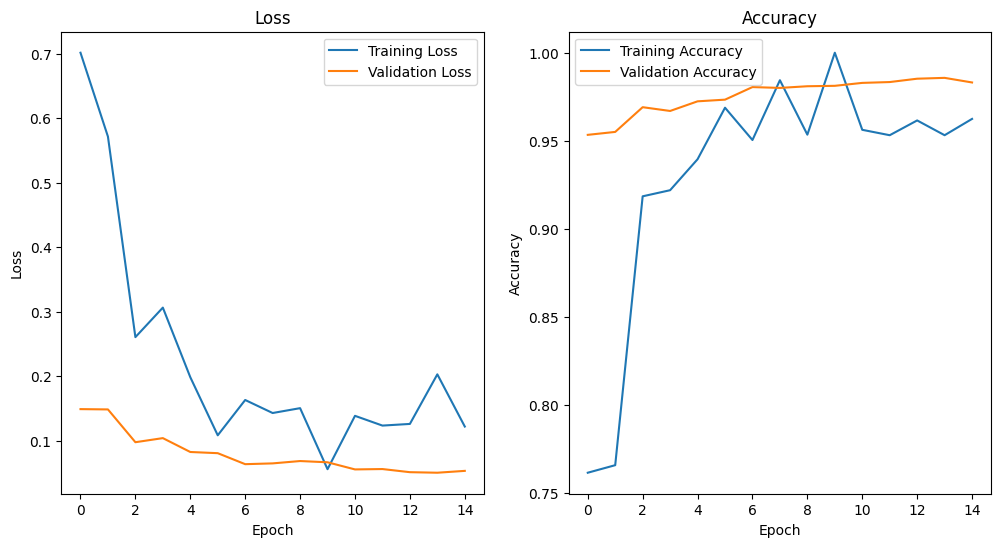

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


### **Plot some sample images before and after preprocessing**

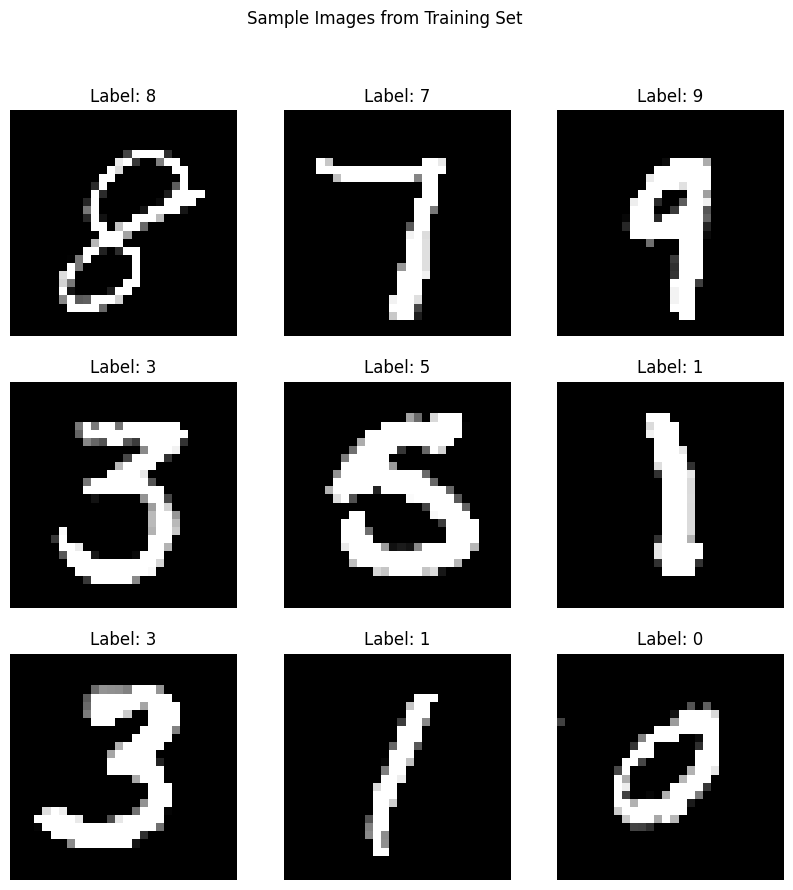

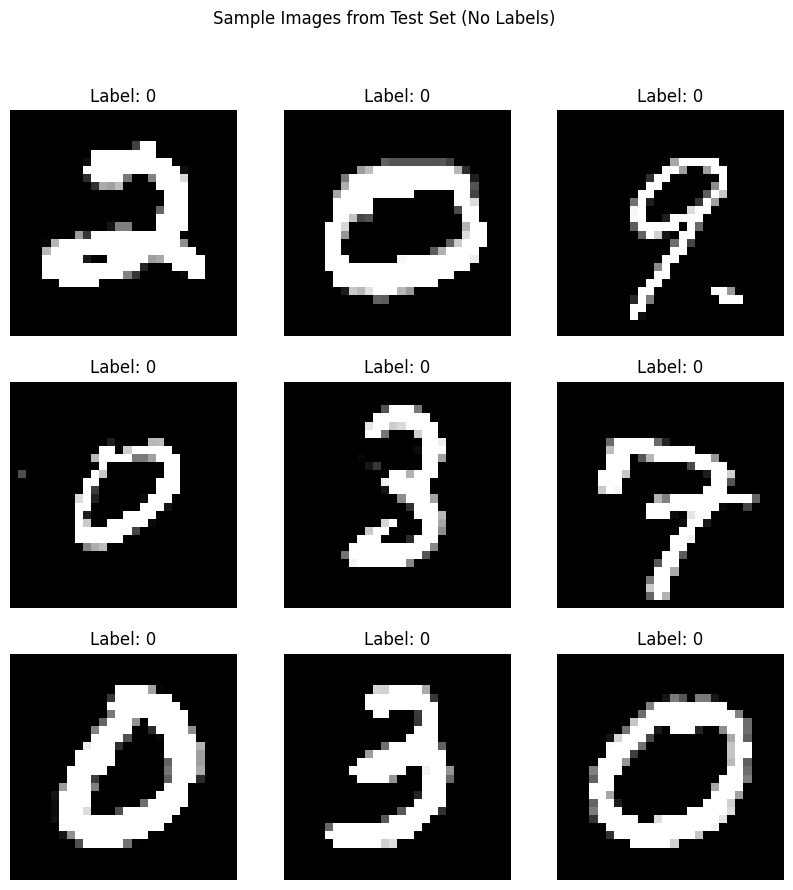

In [19]:
def display_images(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {np.argmax(labels[i])}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display some sample images from the training set
display_images(X_train[:9], Y_train[:9], 'Sample Images from Training Set')

# Display some sample images from the test set
display_images(X_test[:9], np.zeros((9, 10)), 'Sample Images from Test Set (No Labels)')


### **Evaluate model performance on validation set**

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


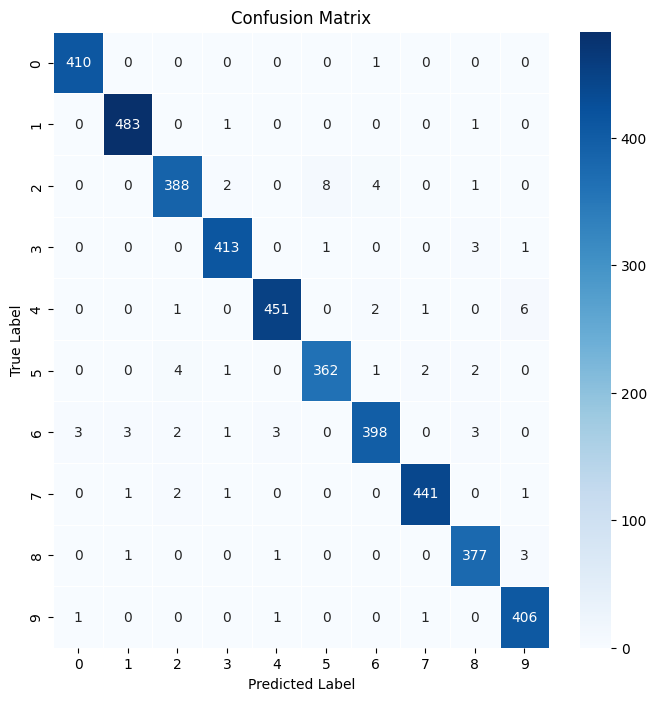

In [20]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()